<a href="https://colab.research.google.com/github/shaharHegyi/camera_undistortion/blob/main/camera_undistortion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2 
from PIL import Image
import numpy as np
from google.colab.patches import cv2_imshow
import os
import glob

!wget http://www.vision.caltech.edu/bouguetj/calib_doc/htmls/calib_example.zip
!unzip calib_example.zip -d calib_example

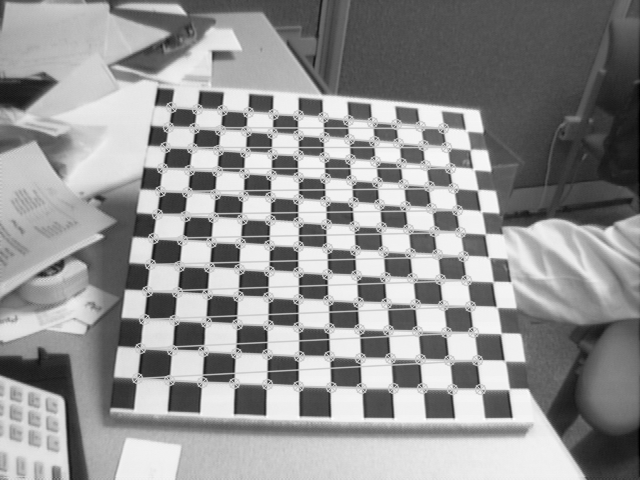

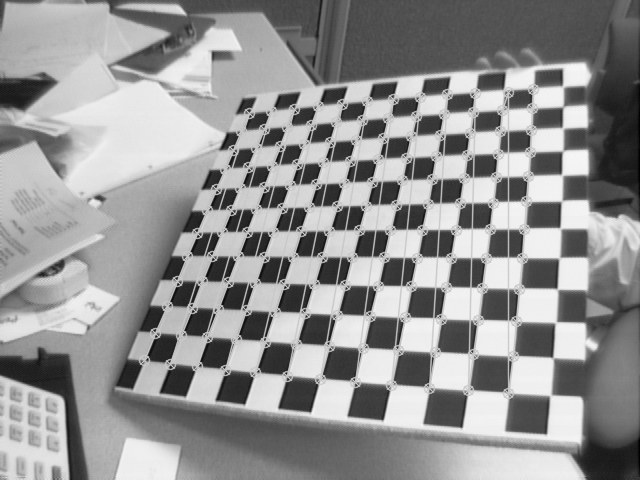

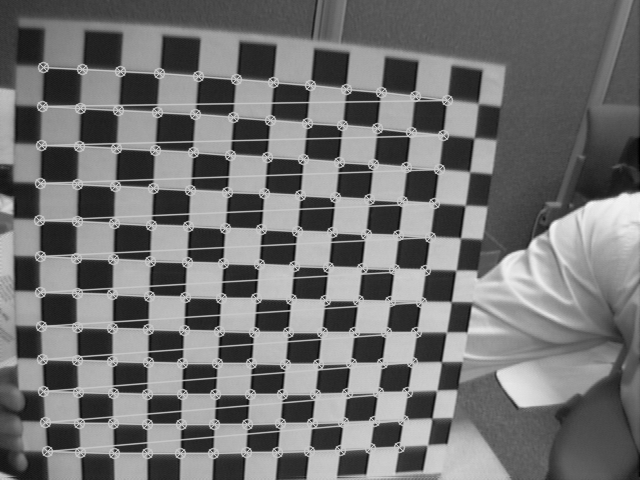

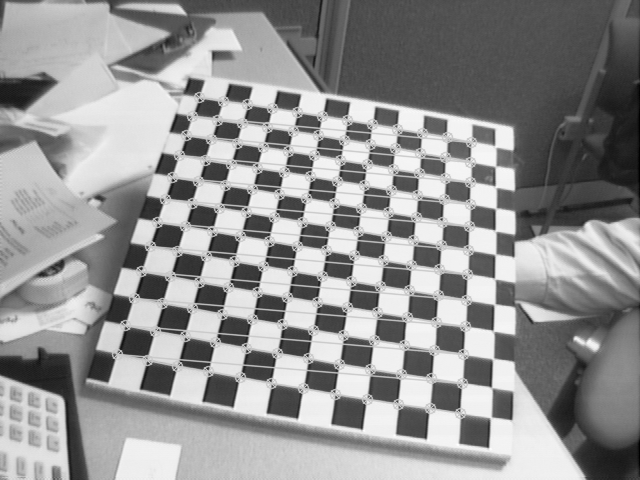

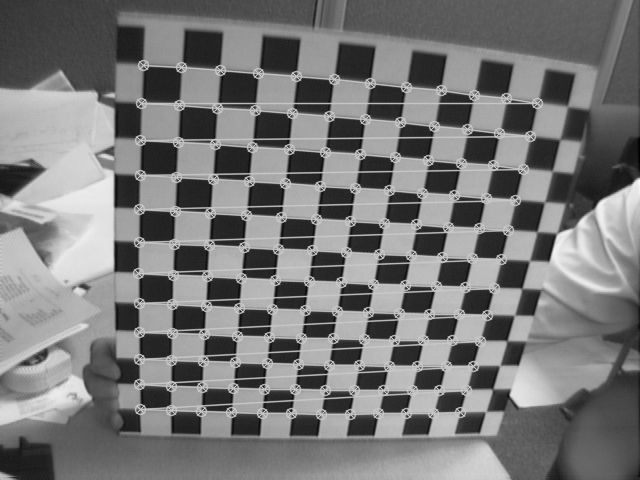

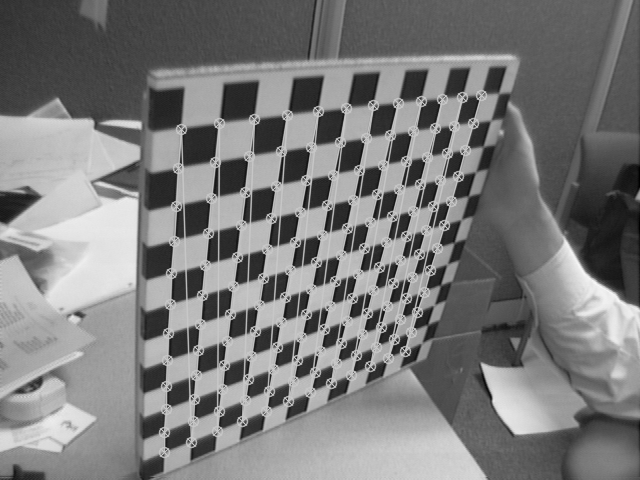

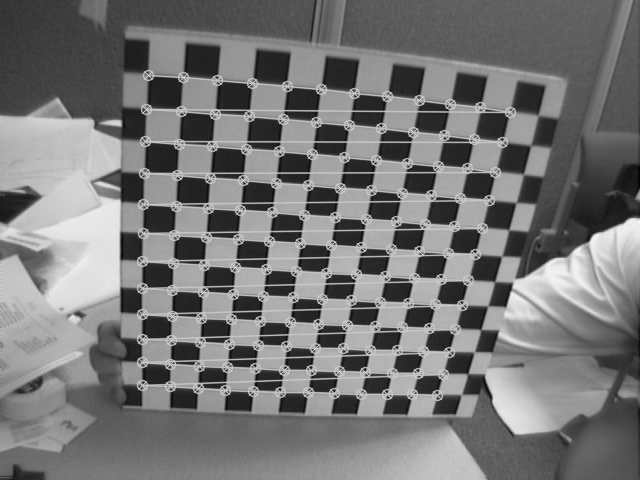

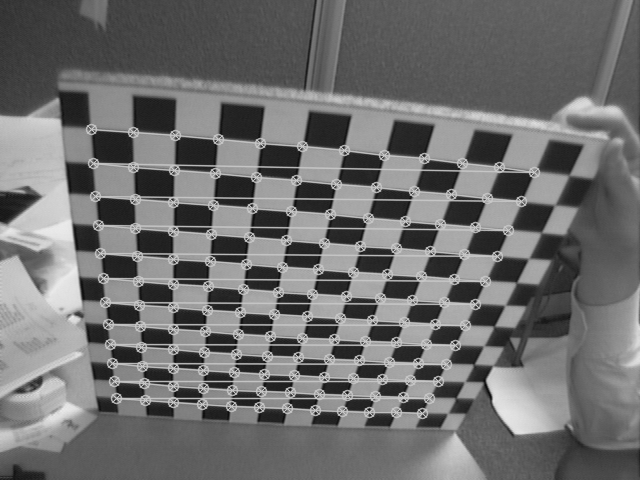

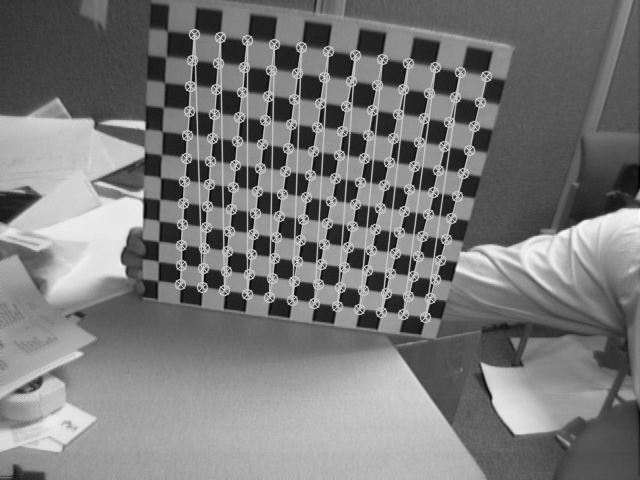

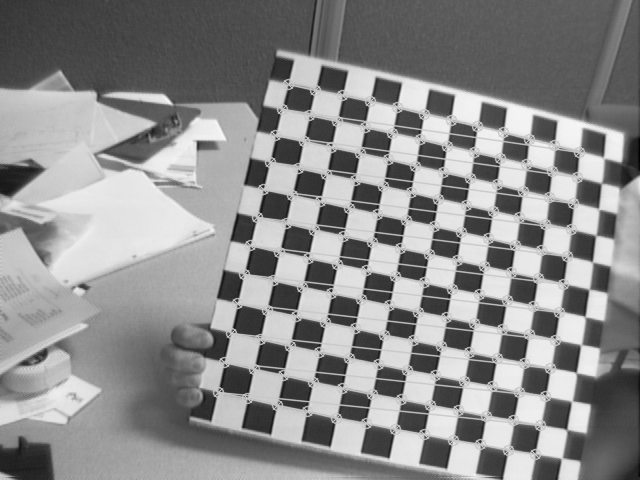

In [271]:
# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
# checkerboard Dimensions
cbrow = 12
cbcol = 12

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((cbrow * cbcol, 3), np.float32)
objp[:, :2] = np.mgrid[0:cbcol, 0:cbrow].T.reshape(-1, 2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

images = glob.glob('*.tif')

for fname in images:
    img = cv2.imread(fname,0)
    gray = img

    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (cbrow,cbcol),None)

    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)

        corners2 = cv2.cornerSubPix(gray,corners,(4,4),(-1,-1),criteria)
        imgpoints.append(corners2.squeeze())

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (cbrow,cbcol), corners2,ret)
        cv2_imshow(img)
        cv2.waitKey(500)

cv2.destroyAllWindows()
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints,gray.shape,None,None)

 original - note curved top of checkerboard 



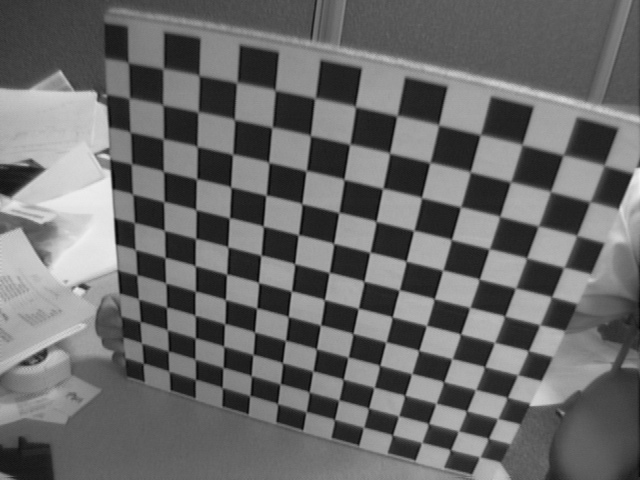

undistorted - curved top is now straight


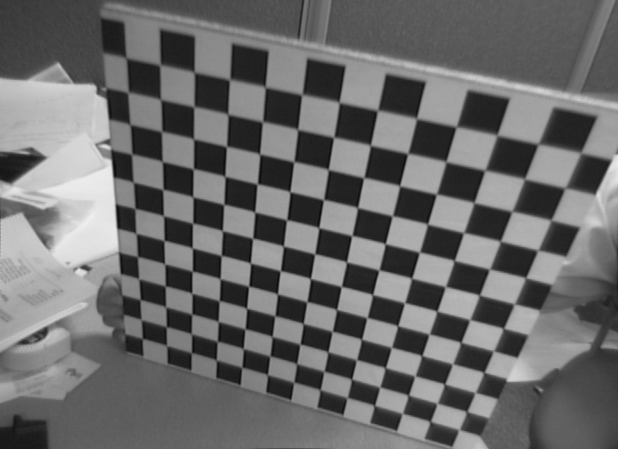

In [277]:
img = cv2.imread('Image17.tif',0)
h,  w = img.shape
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))

# undistort
dst = cv2.undistort(img, mtx, dist, None, newcameramtx)

# crop the image
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]
print('original - note curved top of checkerboard \n')
cv2_imshow(img)
print('undistorted - curved top is now straight \n')
cv2_imshow(dst)
